In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import svm
from sklearn import tree
from sklearn.feature_selection import SelectPercentile, f_classif
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import metrics
import lime.lime_tabular as lm#the type of LIIME analysis we’ll do
import shap #SHAP package
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def load_data(data):
    del data['Unnamed: 0']
    data['Class'] = data['Classe']
    del data['Classe']
    return data

data_rapid = load_data(pd.read_csv("../input/dt-covid-influ-balanced/df_rapid_covid_inf.csv"))
data_pcr= load_data(pd.read_csv("../input/dt-covid-influ-balanced/df_pcr_covid_inf.csv"))
data_both= load_data(pd.read_csv("../input/dt-covid-influ-balanced/df_both_covid_inf.csv"))
x_col=data_rapid.iloc[:,:16].columns

In [3]:
def RandomForest_classif(x_train,y_train,param):
    #Classification
    
    
    clf= RandomForestClassifier(**param)
    clf=clf.fit(x_train, y_train)
    
    return clf

def Kneighbors_classif(x_train,y_train,param):
    #Classification
    

    clf= KNeighborsClassifier(**param)
    clf= clf.fit(x_train, y_train)
    
    return clf

def DecisionTree_classif(x_train,y_train,param):
    #Classification
    
    clf = tree.DecisionTreeClassifier(**param)
    clf = clf.fit(x_train,y_train)
    
    return clf

def mpl_classif(x_train,y_train,param):
    
    clf =  MLPClassifier(**param)
    clf=clf.fit(x_train,y_train)
    
    return clf

def gb_classif(x_train,y_train,param):
    
    clf=GradientBoostingClassifier(**param)
    clf=clf.fit(x_train, y_train)
    
    return clf

def xgb_classif(x_train,y_train,param):
    clf = xgb.XGBClassifier(**param)
    
    return clf.fit(x_train, y_train)

def svc_classif(x_train,y_train,param):
    
    regr = svm.SVC(**param)
    regr=regr.fit(x_train, y_train)

    return regr

def lg_with_regu_classif(x_train,y_train,param):
    
    clf = LogisticRegression(** param)
    clf=clf.fit(x_train,y_train)
    
    return clf
def lg_without_regu_classif(x_train,y_train,param):
    
    clf = LogisticRegression(** param)
    clf=clf.fit(x_train,y_train)
    
    return clf




In [4]:
def calculate_feature_importance(model) :
    feat_importances = pd.Series(model.feature_importances_, index=x_col)
    # determine top most important features
    return feat_importances.nlargest(len(x_col))

def calculate_feature_importance2(model) :
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=x_col)
    # determine top most important features
    return feat_importances.nlargest(len(x_col))


In [5]:
def feature_importance(X_train, X_val, y_train, y_val,model,label):
    
    r = permutation_importance(model, X_val, y_val,n_repeats=50,random_state=0)
    for i in r.importances_mean.argsort()[::-1]:
       
            print(f"{X_train.columns[i]:<8}" f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")
    sorted_idx = r.importances_mean.argsort()

    fig, ax = plt.subplots()
    ax.boxplot(r.importances[sorted_idx].T,
               vert=False, labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances:"+label)
    fig.tight_layout()
    plt.show()
    


In [6]:
def plot_feature_importance(importance,color_importace,classif_name): 
    indices =importance.values
    features = importance.index
    plt.title(classif_name+'\nTop Feature Importances')
    plt.barh(range(len(indices)), indices, color=color_importace, align='center')
    plt.yticks(range(len(indices)), features)
    plt.xlabel('Relative Importance')
    plt.show()

# rapid_test_balanced

In [7]:
x_rapid_balan=data_rapid.iloc[:,:16]
y_rapid_balan=data_rapid['Class']


In [8]:
lista_param=[
             {},
             {},
             {'kernel': 'rbf', 'C': 6,'probability':True},
             {'weights': 'distance', 'n_neighbors': 15,'n_jobs': None, 'leaf_size': 5, 'algorithm': 'ball_tree'},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'solver': 'adam', 'random_state': 1, 'max_iter': 1200, 'learning_rate': 'adaptive','alpha': 0.0001, 'activation': 'relu'},
             {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

Febre   0.152 +/- 0.008
Dispnéia0.132 +/- 0.008
Saturação do Oxigenio0.120 +/- 0.008
Desconforto Respiratório0.106 +/- 0.008
Gênero  0.095 +/- 0.009
Tosse   0.084 +/- 0.008
Dor de Garganta0.078 +/- 0.007
Distúrbios do Olfato0.072 +/- 0.006
Dor de Cabeça0.053 +/- 0.005
Fadiga  0.053 +/- 0.005
Coriza  0.036 +/- 0.003
Distúrbio do paladar0.035 +/- 0.004
Profissional de Saúde?0.015 +/- 0.003
Vomito  0.012 +/- 0.003
Diarreia0.005 +/- 0.002
Dor Abdominal0.004 +/- 0.001


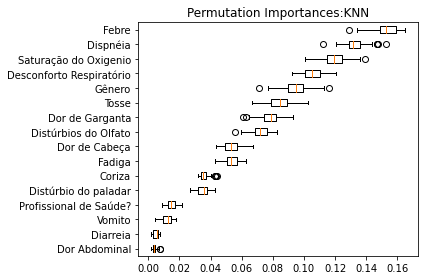

In [9]:
X_train, X_val, y_train, y_val  = train_test_split(x_rapid_balan,y_rapid_balan, 
                                  test_size=0.5,random_state=0,stratify=y_rapid_balan)
model=Kneighbors_classif(X_train,y_train,lista_param[3])
feature_importance(X_train, X_val, y_train, y_val,model,'KNN')


Febre   0.143 +/- 0.007
Saturação do Oxigenio0.125 +/- 0.007
Dispnéia0.118 +/- 0.007
Desconforto Respiratório0.092 +/- 0.007
Gênero  0.076 +/- 0.007
Distúrbios do Olfato0.075 +/- 0.005
Tosse   0.068 +/- 0.008
Dor de Garganta0.062 +/- 0.006
Fadiga  0.061 +/- 0.006
Coriza  0.047 +/- 0.003
Dor de Cabeça0.044 +/- 0.004
Distúrbio do paladar0.034 +/- 0.003
Vomito  0.019 +/- 0.004
Diarreia0.017 +/- 0.004
Profissional de Saúde?0.016 +/- 0.003
Dor Abdominal0.007 +/- 0.002


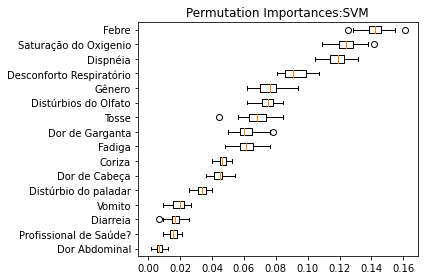

In [10]:
model= svc_classif(X_train,y_train,lista_param[2])
feature_importance(X_train, X_val, y_train, y_val,model,'SVM')



Saturação do Oxigenio0.165 +/- 0.008
Desconforto Respiratório0.156 +/- 0.008
Febre   0.148 +/- 0.007
Dispnéia0.136 +/- 0.008
Gênero  0.100 +/- 0.009
Distúrbios do Olfato0.087 +/- 0.006
Tosse   0.072 +/- 0.007
Dor de Garganta0.072 +/- 0.006
Fadiga  0.055 +/- 0.005
Dor de Cabeça0.045 +/- 0.004
Coriza  0.039 +/- 0.003
Distúrbio do paladar0.023 +/- 0.004
Vomito  0.015 +/- 0.004
Profissional de Saúde?0.015 +/- 0.002
Diarreia0.009 +/- 0.002
Dor Abdominal0.003 +/- 0.001


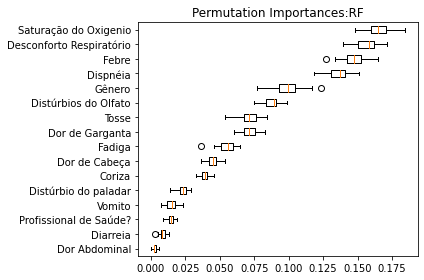

In [11]:
model=RandomForest_classif(X_train,y_train,lista_param[1])
feature_importance(X_train, X_val, y_train, y_val,model,'RF')

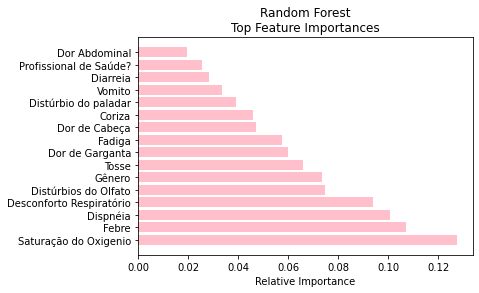

In [12]:
model_rf= RandomForest_classif(x_rapid_balan,y_rapid_balan,lista_param[1])
importance_rf=calculate_feature_importance(model_rf)
plot_feature_importance(importance_rf,'pink','Random Forest')


In [13]:
importance_rf

Saturação do Oxigenio       0.127450
Febre                       0.107211
Dispnéia                    0.100784
Desconforto Respiratório    0.093763
Distúrbios do Olfato        0.074645
Gênero                      0.073434
Tosse                       0.065861
Dor de Garganta             0.059946
Fadiga                      0.057566
Dor de Cabeça               0.047199
Coriza                      0.045920
Distúrbio do paladar        0.039163
Vomito                      0.033698
Diarreia                    0.028235
Profissional de Saúde?      0.025459
Dor Abdominal               0.019667
dtype: float64

Saturação do Oxigenio0.194 +/- 0.008
Febre   0.158 +/- 0.009
Dispnéia0.144 +/- 0.009
Desconforto Respiratório0.113 +/- 0.007
Distúrbios do Olfato0.096 +/- 0.006
Gênero  0.096 +/- 0.010
Tosse   0.086 +/- 0.008
Dor de Garganta0.073 +/- 0.006
Fadiga  0.072 +/- 0.006
Dor de Cabeça0.053 +/- 0.004
Coriza  0.046 +/- 0.003
Distúrbio do paladar0.036 +/- 0.004
Vomito  0.017 +/- 0.003
Profissional de Saúde?0.014 +/- 0.002
Diarreia0.012 +/- 0.003
Dor Abdominal0.008 +/- 0.002


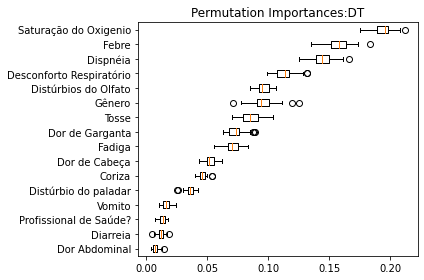

In [14]:
model=DecisionTree_classif(X_train,y_train,lista_param[0])
feature_importance(X_train, X_val, y_train, y_val,model,'DT')

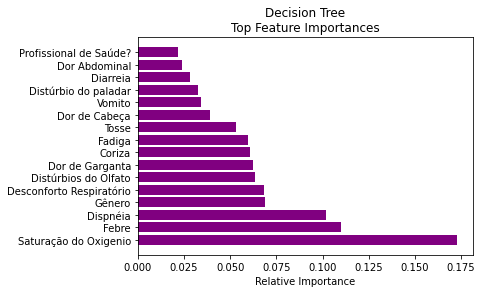

In [15]:
model_dt= DecisionTree_classif(x_rapid_balan,y_rapid_balan,lista_param[0])
importance_dt=calculate_feature_importance(model_dt)
plot_feature_importance(importance_dt,'purple','Decision Tree')

In [16]:
importance_dt

Saturação do Oxigenio       0.172666
Febre                       0.110166
Dispnéia                    0.101608
Gênero                      0.068540
Desconforto Respiratório    0.068208
Distúrbios do Olfato        0.063470
Dor de Garganta             0.062559
Coriza                      0.060643
Fadiga                      0.059428
Tosse                       0.053224
Dor de Cabeça               0.039193
Vomito                      0.033974
Distúrbio do paladar        0.032618
Diarreia                    0.028246
Dor Abdominal               0.023783
Profissional de Saúde?      0.021675
dtype: float64

Febre   0.148 +/- 0.008
Saturação do Oxigenio0.140 +/- 0.008
Dispnéia0.130 +/- 0.008
Desconforto Respiratório0.109 +/- 0.007
Gênero  0.096 +/- 0.009
Distúrbios do Olfato0.083 +/- 0.005
Dor de Garganta0.080 +/- 0.006
Tosse   0.075 +/- 0.007
Fadiga  0.056 +/- 0.005
Coriza  0.054 +/- 0.004
Dor de Cabeça0.047 +/- 0.004
Distúrbio do paladar0.042 +/- 0.004
Vomito  0.019 +/- 0.004
Profissional de Saúde?0.013 +/- 0.003
Diarreia0.013 +/- 0.003
Dor Abdominal0.004 +/- 0.002


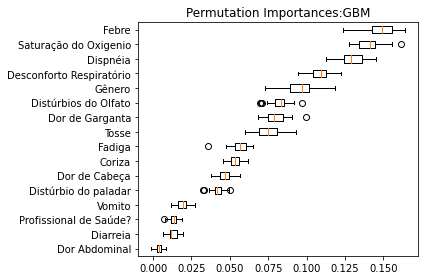

In [17]:
model=gb_classif(X_train,y_train,lista_param[4])
feature_importance(X_train, X_val, y_train, y_val,model,'GBM')

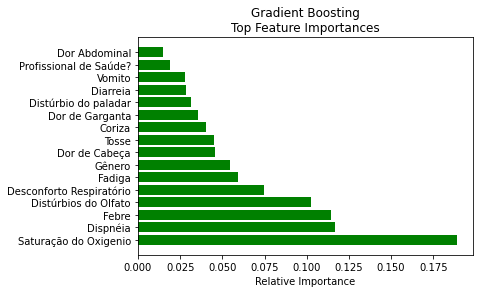

In [18]:
model_gb=gb_classif(x_rapid_balan,y_rapid_balan,lista_param[4])
importance_gb=calculate_feature_importance(model_gb)
plot_feature_importance(importance_gb,'green','Gradient Boosting')


In [19]:
importance_gb

Saturação do Oxigenio       0.188966
Dispnéia                    0.116545
Febre                       0.114326
Distúrbios do Olfato        0.102591
Desconforto Respiratório    0.074813
Fadiga                      0.059120
Gênero                      0.054689
Dor de Cabeça               0.045777
Tosse                       0.045112
Coriza                      0.040116
Dor de Garganta             0.035451
Distúrbio do paladar        0.031512
Diarreia                    0.028625
Vomito                      0.028087
Profissional de Saúde?      0.019260
Dor Abdominal               0.015007
dtype: float64

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:23:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Saturação do Oxigenio0.154 +/- 0.007
Febre   0.152 +/- 0.007
Dispnéia0.136 +/- 0.008
Desconforto Respiratório0.121 +/- 0.008
Gênero  0.095 +/- 0.008
Distúrbios do Olfato0.084 +/- 0.005
Dor de Garganta0.075 +/- 0.006
Tosse   0.067 +/- 0.008
Fadiga  0.055 +/- 0.005
Dor de Cabeça0.055 +/- 0.004
Coriza  0.048 +/- 0.003
Distúrbio do paladar0.039 +/- 0.004
Vomito  0.020 +/- 0.004
Profissional de Saúde?0.018 +/- 0.003
Diarreia0.015 +/- 0.004
Dor Abdominal0.007 +/- 0.002


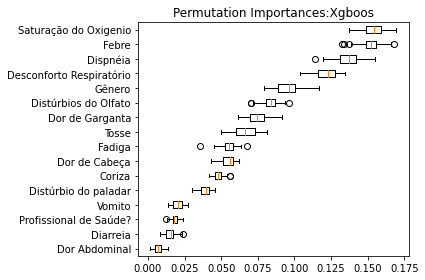

In [20]:
model=xgb_classif(X_train,y_train,lista_param[8])
feature_importance(X_train, X_val, y_train, y_val,model,'Xgboos')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:23:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


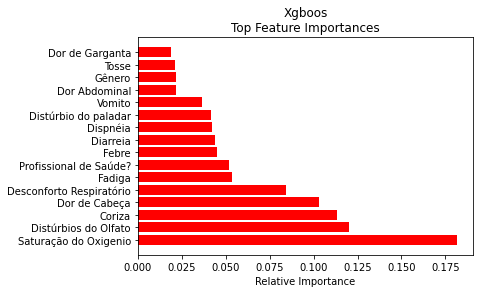

In [21]:
model_xgb=xgb_classif(x_rapid_balan,y_rapid_balan,lista_param[8])
importance_xgb=calculate_feature_importance(model_xgb)
plot_feature_importance(importance_xgb,'red','Xgboos')


In [22]:
importance_xgb

Saturação do Oxigenio       0.181491
Distúrbios do Olfato        0.119937
Coriza                      0.113570
Dor de Cabeça               0.103269
Desconforto Respiratório    0.084408
Fadiga                      0.053390
Profissional de Saúde?      0.051963
Febre                       0.045191
Diarreia                    0.043715
Dispnéia                    0.042224
Distúrbio do paladar        0.041558
Vomito                      0.036244
Dor Abdominal               0.021847
Gênero                      0.021566
Tosse                       0.021071
Dor de Garganta             0.018555
dtype: float32

Febre   0.141 +/- 0.007
Saturação do Oxigenio0.132 +/- 0.007
Dispnéia0.129 +/- 0.008
Desconforto Respiratório0.090 +/- 0.007
Gênero  0.090 +/- 0.009
Distúrbios do Olfato0.074 +/- 0.005
Tosse   0.071 +/- 0.007
Fadiga  0.067 +/- 0.005
Dor de Garganta0.064 +/- 0.006
Dor de Cabeça0.049 +/- 0.005
Coriza  0.041 +/- 0.003
Distúrbio do paladar0.032 +/- 0.004
Vomito  0.019 +/- 0.004
Diarreia0.018 +/- 0.003
Profissional de Saúde?0.017 +/- 0.003
Dor Abdominal0.011 +/- 0.003


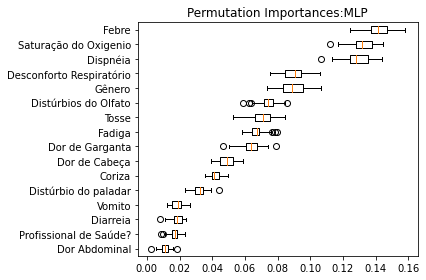

In [23]:
model=mpl_classif(X_train,y_train,lista_param[7])
feature_importance(X_train, X_val, y_train, y_val,model,'MLP')


Febre   0.099 +/- 0.008
Dispnéia0.088 +/- 0.008
Saturação do Oxigenio0.080 +/- 0.007
Distúrbios do Olfato0.069 +/- 0.005
Desconforto Respiratório0.054 +/- 0.006
Tosse   0.035 +/- 0.008
Coriza  0.020 +/- 0.003
Fadiga  0.017 +/- 0.004
Dor de Cabeça0.016 +/- 0.004
Diarreia0.010 +/- 0.002
Distúrbio do paladar0.007 +/- 0.002
Dor de Garganta0.004 +/- 0.004
Profissional de Saúde?0.004 +/- 0.003
Vomito  0.003 +/- 0.002
Dor Abdominal0.000 +/- 0.002
Gênero  -0.000 +/- 0.003


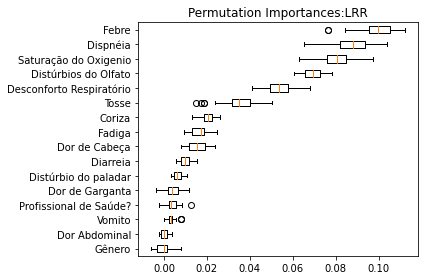

In [24]:
model=lg_with_regu_classif(X_train,y_train,lista_param[5])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')



Febre   0.130 +/- 0.010
Saturação do Oxigenio0.084 +/- 0.007
Dispnéia0.081 +/- 0.007
Distúrbios do Olfato0.066 +/- 0.005
Desconforto Respiratório0.056 +/- 0.007
Tosse   0.029 +/- 0.008
Coriza  0.028 +/- 0.003
Fadiga  0.022 +/- 0.005
Dor de Cabeça0.015 +/- 0.005
Diarreia0.009 +/- 0.003
Distúrbio do paladar0.009 +/- 0.002
Vomito  0.007 +/- 0.003
Profissional de Saúde?0.005 +/- 0.003
Dor de Garganta0.004 +/- 0.004
Dor Abdominal0.000 +/- 0.002
Gênero  -0.002 +/- 0.003


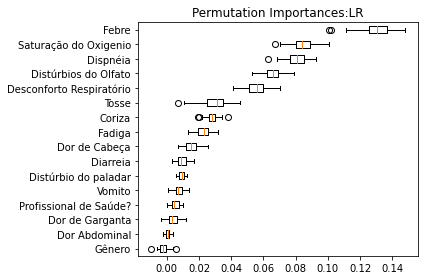

In [25]:
model=lg_without_regu_classif(X_train,y_train,lista_param[6])
feature_importance(X_train, X_val, y_train, y_val,model,'LR')

# pcr_test_balanced

In [26]:
lista_param=[
{},
{},
{'kernel': 'rbf', 'C': 7,'probability':True},
{'weights': 'distance', 'n_neighbors': 5, 'n_jobs': None, 'leaf_size': 3, 'algorithm': 'kd_tree'},
{'n_estimators':500,'max_depth':5},
{'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
{'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
{'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
{'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

In [27]:
x_pcr=data_pcr.iloc[:,:16]
y_pcr=data_pcr['Class']
X_train, X_val, y_train, y_val  = train_test_split(x_pcr,y_pcr,test_size=0.5,random_state=0,stratify=y_pcr)

Febre   0.229 +/- 0.008
Gênero  0.132 +/- 0.007
Saturação do Oxigenio0.125 +/- 0.007
Desconforto Respiratório0.117 +/- 0.007
Tosse   0.106 +/- 0.007
Dispnéia0.094 +/- 0.007
Dor de Garganta0.081 +/- 0.006
Fadiga  0.036 +/- 0.005
Profissional de Saúde?0.035 +/- 0.003
Vomito  0.028 +/- 0.004
Diarreia0.021 +/- 0.003
Distúrbio do paladar0.014 +/- 0.002
Dor de Cabeça0.013 +/- 0.002
Coriza  0.011 +/- 0.002
Distúrbios do Olfato0.008 +/- 0.002
Dor Abdominal0.004 +/- 0.002


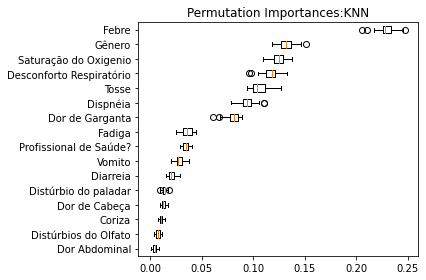

In [28]:
model=Kneighbors_classif(X_train,y_train,lista_param[3])
feature_importance(X_train, X_val, y_train, y_val,model,'KNN')


Febre   0.219 +/- 0.008
Saturação do Oxigenio0.152 +/- 0.007
Desconforto Respiratório0.135 +/- 0.008
Gênero  0.125 +/- 0.006
Tosse   0.098 +/- 0.007
Dispnéia0.080 +/- 0.006
Dor de Garganta0.069 +/- 0.006
Fadiga  0.059 +/- 0.005
Vomito  0.039 +/- 0.004
Diarreia0.028 +/- 0.003
Profissional de Saúde?0.021 +/- 0.002
Dor Abdominal0.015 +/- 0.003
Distúrbio do paladar0.014 +/- 0.002
Distúrbios do Olfato0.010 +/- 0.002
Dor de Cabeça0.007 +/- 0.002
Coriza  0.003 +/- 0.002


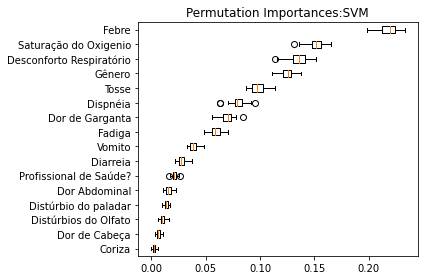

In [29]:
model= svc_classif(X_train,y_train,lista_param[2])
feature_importance(X_train, X_val, y_train, y_val,model,'SVM')

Febre   0.234 +/- 0.008
Saturação do Oxigenio0.161 +/- 0.007
Desconforto Respiratório0.156 +/- 0.008
Gênero  0.137 +/- 0.007
Tosse   0.102 +/- 0.007
Dispnéia0.093 +/- 0.007
Dor de Garganta0.075 +/- 0.005
Fadiga  0.057 +/- 0.006
Vomito  0.035 +/- 0.004
Profissional de Saúde?0.029 +/- 0.003
Diarreia0.027 +/- 0.003
Dor de Cabeça0.013 +/- 0.002
Dor Abdominal0.011 +/- 0.002
Distúrbio do paladar0.009 +/- 0.002
Coriza  0.007 +/- 0.002
Distúrbios do Olfato0.004 +/- 0.002


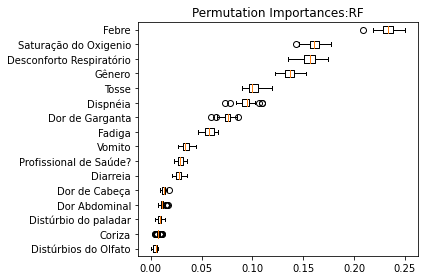

In [30]:
model=RandomForest_classif(X_train,y_train,lista_param[1])
feature_importance(X_train, X_val, y_train, y_val,model,'RF')

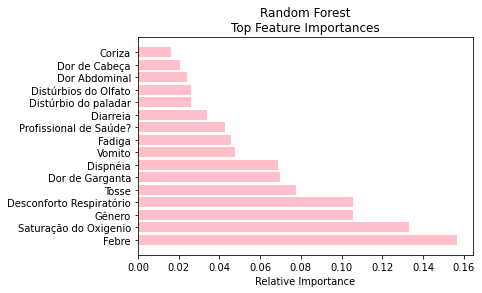

In [31]:
model_rf= RandomForest_classif(x_pcr,y_pcr,lista_param[1])
importance_rf=calculate_feature_importance(model_rf)
plot_feature_importance(importance_rf,'pink','Random Forest')


In [32]:
importance_rf

Febre                       0.156591
Saturação do Oxigenio       0.133110
Gênero                      0.105496
Desconforto Respiratório    0.105409
Tosse                       0.077690
Dor de Garganta             0.069934
Dispnéia                    0.068799
Vomito                      0.047608
Fadiga                      0.045662
Profissional de Saúde?      0.042989
Diarreia                    0.034020
Distúrbio do paladar        0.026188
Distúrbios do Olfato        0.025828
Dor Abdominal               0.024115
Dor de Cabeça               0.020548
Coriza                      0.016012
dtype: float64

Febre   0.230 +/- 0.008
Saturação do Oxigenio0.166 +/- 0.008
Desconforto Respiratório0.155 +/- 0.008
Gênero  0.133 +/- 0.007
Tosse   0.101 +/- 0.007
Dispnéia0.095 +/- 0.006
Dor de Garganta0.073 +/- 0.005
Fadiga  0.047 +/- 0.005
Vomito  0.036 +/- 0.004
Profissional de Saúde?0.026 +/- 0.002
Diarreia0.024 +/- 0.003
Distúrbios do Olfato0.017 +/- 0.002
Distúrbio do paladar0.014 +/- 0.002
Dor de Cabeça0.012 +/- 0.002
Dor Abdominal0.006 +/- 0.002
Coriza  0.006 +/- 0.002


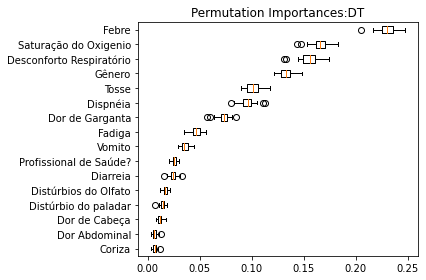

In [33]:
model=DecisionTree_classif(X_train,y_train,lista_param[0])
feature_importance(X_train, X_val, y_train, y_val,model,'DT')

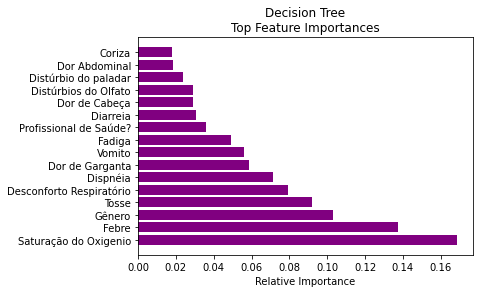

In [34]:
model_dt= DecisionTree_classif(x_pcr,y_pcr,lista_param[0])
importance_dt=calculate_feature_importance(model_dt)
plot_feature_importance(importance_dt,'purple','Decision Tree')

In [35]:
importance_dt

Saturação do Oxigenio       0.168473
Febre                       0.137514
Gênero                      0.102989
Tosse                       0.091793
Desconforto Respiratório    0.079246
Dispnéia                    0.071547
Dor de Garganta             0.058494
Vomito                      0.056135
Fadiga                      0.048926
Profissional de Saúde?      0.036158
Diarreia                    0.030426
Dor de Cabeça               0.029257
Distúrbios do Olfato        0.028846
Distúrbio do paladar        0.023689
Dor Abdominal               0.018510
Coriza                      0.017997
dtype: float64

Febre   0.235 +/- 0.009
Saturação do Oxigenio0.149 +/- 0.007
Desconforto Respiratório0.141 +/- 0.008
Gênero  0.138 +/- 0.007
Tosse   0.105 +/- 0.007
Dispnéia0.098 +/- 0.007
Dor de Garganta0.077 +/- 0.006
Fadiga  0.055 +/- 0.006
Vomito  0.037 +/- 0.004
Profissional de Saúde?0.029 +/- 0.003
Diarreia0.028 +/- 0.003
Distúrbio do paladar0.019 +/- 0.002
Dor Abdominal0.013 +/- 0.003
Dor de Cabeça0.012 +/- 0.002
Distúrbios do Olfato0.009 +/- 0.002
Coriza  0.007 +/- 0.002


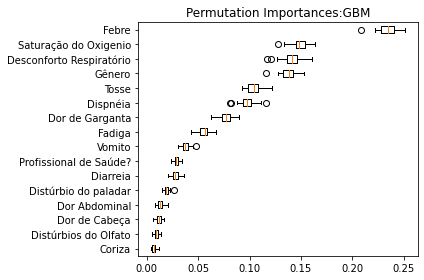

In [36]:
model=gb_classif(X_train,y_train,lista_param[4])
feature_importance(X_train, X_val, y_train, y_val,model,'GBM')

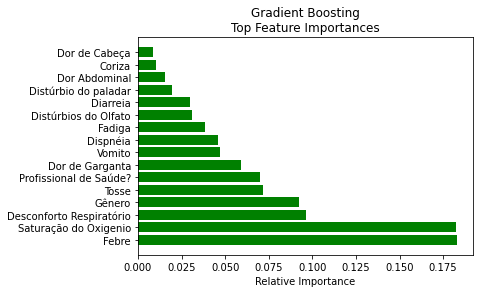

In [37]:
model_gb=gb_classif(x_pcr,y_pcr,lista_param[4])
importance_gb=calculate_feature_importance(model_gb)
plot_feature_importance(importance_gb,'green','Gradient Boosting')


In [38]:
importance_gb

Febre                       0.182833
Saturação do Oxigenio       0.182494
Desconforto Respiratório    0.096203
Gênero                      0.092243
Tosse                       0.071508
Profissional de Saúde?      0.069823
Dor de Garganta             0.059006
Vomito                      0.047098
Dispnéia                    0.045805
Fadiga                      0.038341
Distúrbios do Olfato        0.030830
Diarreia                    0.029706
Distúrbio do paladar        0.019774
Dor Abdominal               0.015563
Coriza                      0.010333
Dor de Cabeça               0.008438
dtype: float64

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:30:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Febre   0.230 +/- 0.008
Saturação do Oxigenio0.154 +/- 0.008
Desconforto Respiratório0.144 +/- 0.008
Gênero  0.137 +/- 0.007
Tosse   0.102 +/- 0.007
Dispnéia0.092 +/- 0.007
Dor de Garganta0.079 +/- 0.005
Fadiga  0.058 +/- 0.006
Vomito  0.037 +/- 0.004
Profissional de Saúde?0.031 +/- 0.003
Diarreia0.028 +/- 0.003
Dor Abdominal0.013 +/- 0.002
Distúrbios do Olfato0.010 +/- 0.002
Distúrbio do paladar0.010 +/- 0.002
Dor de Cabeça0.008 +/- 0.002
Coriza  0.005 +/- 0.002


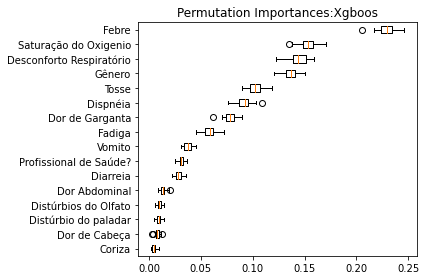

In [39]:
model=xgb_classif(X_train,y_train,lista_param[8])
feature_importance(X_train, X_val, y_train, y_val,model,'Xgboos')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:30:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


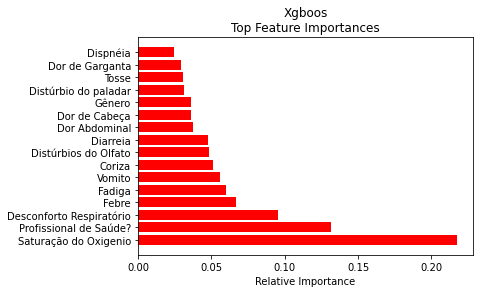

In [40]:
model_xgb=xgb_classif(x_pcr,y_pcr,lista_param[8])
importance_xgb=calculate_feature_importance(model_xgb)
plot_feature_importance(importance_xgb,'red','Xgboos')

In [41]:
importance_xgb

Saturação do Oxigenio       0.217271
Profissional de Saúde?      0.131237
Desconforto Respiratório    0.095762
Febre                       0.066608
Fadiga                      0.059663
Vomito                      0.056122
Coriza                      0.051252
Distúrbios do Olfato        0.048579
Diarreia                    0.047638
Dor Abdominal               0.037778
Dor de Cabeça               0.036060
Gênero                      0.035966
Distúrbio do paladar        0.031386
Tosse                       0.030662
Dor de Garganta             0.029424
Dispnéia                    0.024591
dtype: float32

Febre   0.230 +/- 0.008
Saturação do Oxigenio0.146 +/- 0.008
Desconforto Respiratório0.139 +/- 0.009
Gênero  0.137 +/- 0.007
Tosse   0.105 +/- 0.007
Dispnéia0.100 +/- 0.006
Dor de Garganta0.081 +/- 0.007
Fadiga  0.056 +/- 0.005
Profissional de Saúde?0.043 +/- 0.003
Vomito  0.041 +/- 0.005
Diarreia0.025 +/- 0.003
Dor de Cabeça0.020 +/- 0.002
Distúrbio do paladar0.018 +/- 0.002
Dor Abdominal0.015 +/- 0.003
Distúrbios do Olfato0.013 +/- 0.003
Coriza  0.010 +/- 0.002


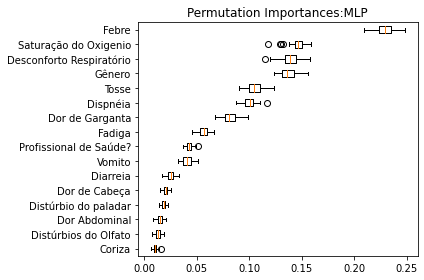

In [42]:
model=mpl_classif(X_train,y_train,lista_param[7])
feature_importance(X_train, X_val, y_train, y_val,model,'MLP')

Febre   0.173 +/- 0.007
Gênero  0.100 +/- 0.007
Saturação do Oxigenio0.090 +/- 0.007
Desconforto Respiratório0.050 +/- 0.006
Tosse   0.049 +/- 0.006
Profissional de Saúde?0.026 +/- 0.003
Vomito  0.017 +/- 0.003
Fadiga  0.011 +/- 0.004
Diarreia0.006 +/- 0.002
Distúrbios do Olfato0.005 +/- 0.002
Dor de Garganta0.004 +/- 0.003
Distúrbio do paladar0.004 +/- 0.002
Dor de Cabeça0.003 +/- 0.002
Coriza  0.003 +/- 0.001
Dor Abdominal0.000 +/- 0.001
Dispnéia-0.009 +/- 0.003


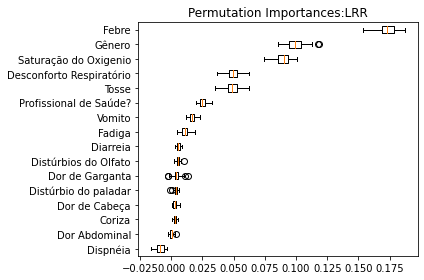

In [43]:
model=lg_with_regu_classif(X_train,y_train,lista_param[5])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')

Febre   0.170 +/- 0.007
Gênero  0.100 +/- 0.007
Saturação do Oxigenio0.094 +/- 0.007
Desconforto Respiratório0.061 +/- 0.007
Tosse   0.037 +/- 0.005
Profissional de Saúde?0.025 +/- 0.003
Vomito  0.020 +/- 0.003
Fadiga  0.015 +/- 0.004
Diarreia0.009 +/- 0.002
Distúrbios do Olfato0.006 +/- 0.002
Dor de Garganta0.003 +/- 0.003
Distúrbio do paladar0.001 +/- 0.001
Dor Abdominal0.001 +/- 0.002
Dor de Cabeça0.001 +/- 0.002
Coriza  0.001 +/- 0.001
Dispnéia-0.008 +/- 0.004


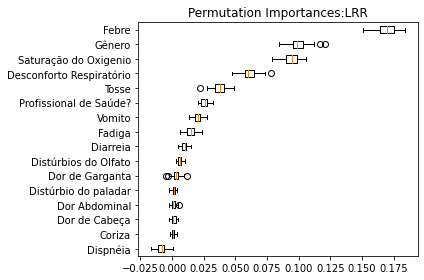

In [44]:
model=lg_without_regu_classif(X_train,y_train,lista_param[6])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')

# both_test_balanced

In [45]:
lista_param=[{},{},{'kernel': 'rbf', 'C': 9},
             {'weights': 'distance','n_neighbors': 8, 'n_jobs': -1,'leaf_size': 5, 'algorithm': 'brute'},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'max_iter': 1200,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
            {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

In [46]:
x_both=data_both.iloc[:,:16]
y_both=data_both['Class']
X_train, X_val, y_train, y_val  = train_test_split(x_both,y_both, 
                                  test_size=0.5,random_state=0,stratify=y_both)

Febre   0.165 +/- 0.006
Saturação do Oxigenio0.136 +/- 0.005
Dispnéia0.111 +/- 0.006
Gênero  0.110 +/- 0.005
Desconforto Respiratório0.103 +/- 0.005
Tosse   0.090 +/- 0.005
Dor de Garganta0.080 +/- 0.004
Fadiga  0.041 +/- 0.003
Distúrbios do Olfato0.036 +/- 0.002
Vomito  0.033 +/- 0.003
Dor de Cabeça0.031 +/- 0.002
Distúrbio do paladar0.021 +/- 0.003
Profissional de Saúde?0.018 +/- 0.002
Coriza  0.016 +/- 0.001
Diarreia0.012 +/- 0.002
Dor Abdominal0.004 +/- 0.002


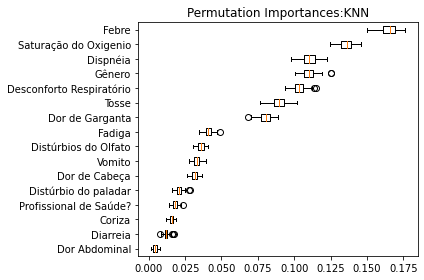

In [47]:
model=Kneighbors_classif(X_train,y_train,lista_param[3])
feature_importance(X_train, X_val, y_train, y_val,model,'KNN')


Febre   0.173 +/- 0.006
Saturação do Oxigenio0.157 +/- 0.006
Desconforto Respiratório0.133 +/- 0.004
Gênero  0.109 +/- 0.005
Dispnéia0.092 +/- 0.005
Dor de Garganta0.083 +/- 0.004
Tosse   0.079 +/- 0.005
Fadiga  0.047 +/- 0.003
Distúrbios do Olfato0.040 +/- 0.002
Vomito  0.035 +/- 0.004
Dor de Cabeça0.028 +/- 0.003
Distúrbio do paladar0.022 +/- 0.003
Dor Abdominal0.018 +/- 0.002
Profissional de Saúde?0.018 +/- 0.002
Coriza  0.017 +/- 0.001
Diarreia0.016 +/- 0.002


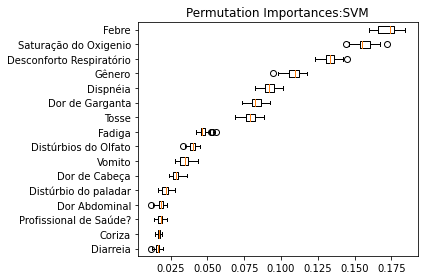

In [48]:
model= svc_classif(X_train,y_train,lista_param[2])
feature_importance(X_train, X_val, y_train, y_val,model,'SVM')

Saturação do Oxigenio0.190 +/- 0.006
Febre   0.183 +/- 0.007
Desconforto Respiratório0.147 +/- 0.004
Gênero  0.121 +/- 0.005
Dispnéia0.103 +/- 0.005
Tosse   0.087 +/- 0.005
Dor de Garganta0.082 +/- 0.004
Fadiga  0.057 +/- 0.003
Distúrbios do Olfato0.039 +/- 0.003
Vomito  0.039 +/- 0.004
Dor de Cabeça0.028 +/- 0.003
Distúrbio do paladar0.019 +/- 0.003
Profissional de Saúde?0.019 +/- 0.002
Coriza  0.017 +/- 0.002
Diarreia0.015 +/- 0.002
Dor Abdominal0.010 +/- 0.002


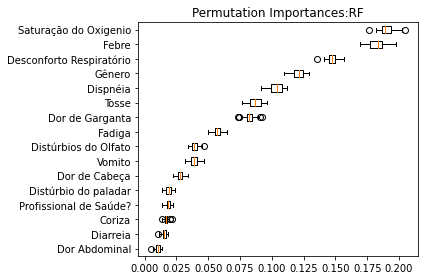

In [49]:
model=RandomForest_classif(X_train,y_train,lista_param[1])
feature_importance(X_train, X_val, y_train, y_val,model,'RF')

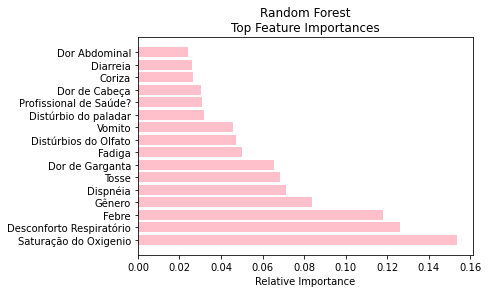

In [50]:
model_rf= RandomForest_classif(x_both,y_both,lista_param[1])
importance_rf=calculate_feature_importance(model_rf)
plot_feature_importance(importance_rf,'pink','Random Forest')

In [51]:
importance_rf

Saturação do Oxigenio       0.153604
Desconforto Respiratório    0.126001
Febre                       0.118159
Gênero                      0.083889
Dispnéia                    0.071487
Tosse                       0.068307
Dor de Garganta             0.065409
Fadiga                      0.050078
Distúrbios do Olfato        0.047121
Vomito                      0.045747
Distúrbio do paladar        0.032049
Profissional de Saúde?      0.030953
Dor de Cabeça               0.030284
Coriza                      0.026463
Diarreia                    0.026139
Dor Abdominal               0.024309
dtype: float64

Saturação do Oxigenio0.191 +/- 0.005
Febre   0.187 +/- 0.006
Desconforto Respiratório0.148 +/- 0.004
Gênero  0.126 +/- 0.006
Dispnéia0.108 +/- 0.005
Tosse   0.088 +/- 0.004
Dor de Garganta0.087 +/- 0.004
Fadiga  0.062 +/- 0.003
Distúrbios do Olfato0.053 +/- 0.003
Vomito  0.041 +/- 0.004
Dor de Cabeça0.033 +/- 0.002
Distúrbio do paladar0.027 +/- 0.003
Diarreia0.017 +/- 0.002
Coriza  0.016 +/- 0.001
Profissional de Saúde?0.016 +/- 0.002
Dor Abdominal0.010 +/- 0.002


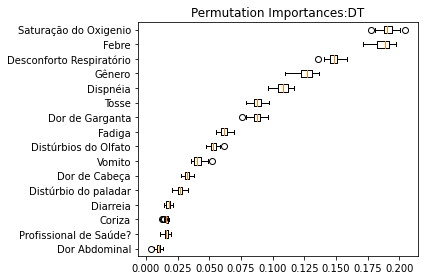

In [52]:
model=DecisionTree_classif(X_train,y_train,lista_param[0])
feature_importance(X_train, X_val, y_train, y_val,model,'DT')

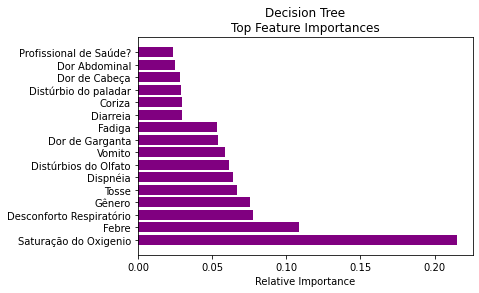

In [53]:
model_dt= DecisionTree_classif(x_both,y_both,lista_param[0])
importance_dt=calculate_feature_importance(model_dt)
plot_feature_importance(importance_dt,'purple','Decision Tree')

In [54]:
importance_dt

Saturação do Oxigenio       0.214956
Febre                       0.108401
Desconforto Respiratório    0.077430
Gênero                      0.075575
Tosse                       0.067026
Dispnéia                    0.063753
Distúrbios do Olfato        0.061693
Vomito                      0.058664
Dor de Garganta             0.053661
Fadiga                      0.053115
Diarreia                    0.029893
Coriza                      0.029414
Distúrbio do paladar        0.029241
Dor de Cabeça               0.028626
Dor Abdominal               0.024700
Profissional de Saúde?      0.023849
dtype: float64

Febre   0.182 +/- 0.006
Saturação do Oxigenio0.171 +/- 0.006
Desconforto Respiratório0.140 +/- 0.004
Gênero  0.123 +/- 0.005
Dispnéia0.103 +/- 0.005
Tosse   0.086 +/- 0.004
Dor de Garganta0.084 +/- 0.004
Fadiga  0.053 +/- 0.003
Distúrbios do Olfato0.047 +/- 0.003
Vomito  0.035 +/- 0.003
Dor de Cabeça0.035 +/- 0.003
Distúrbio do paladar0.024 +/- 0.003
Profissional de Saúde?0.020 +/- 0.002
Dor Abdominal0.018 +/- 0.002
Diarreia0.017 +/- 0.002
Coriza  0.017 +/- 0.001


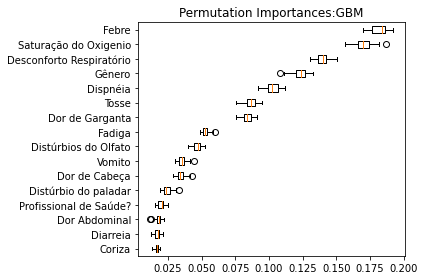

In [55]:
model=gb_classif(X_train,y_train,lista_param[4])
feature_importance(X_train, X_val, y_train, y_val,model,'GBM')

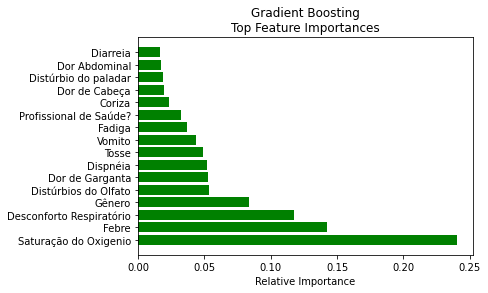

In [56]:
model_gb=gb_classif(x_both,y_both,lista_param[4])
importance_gb=calculate_feature_importance(model_gb)
plot_feature_importance(importance_gb,'green','Gradient Boosting')


In [57]:
importance_gb

Saturação do Oxigenio       0.240278
Febre                       0.142564
Desconforto Respiratório    0.117467
Gênero                      0.083644
Distúrbios do Olfato        0.053693
Dor de Garganta             0.053081
Dispnéia                    0.051756
Tosse                       0.048761
Vomito                      0.043693
Fadiga                      0.036649
Profissional de Saúde?      0.032223
Coriza                      0.023486
Dor de Cabeça               0.019997
Distúrbio do paladar        0.018835
Dor Abdominal               0.017437
Diarreia                    0.016435
dtype: float64

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:44:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Saturação do Oxigenio0.184 +/- 0.006
Febre   0.179 +/- 0.007
Desconforto Respiratório0.143 +/- 0.005
Gênero  0.119 +/- 0.005
Dispnéia0.107 +/- 0.005
Tosse   0.084 +/- 0.004
Dor de Garganta0.083 +/- 0.004
Fadiga  0.055 +/- 0.003
Distúrbios do Olfato0.048 +/- 0.003
Vomito  0.038 +/- 0.003
Dor de Cabeça0.031 +/- 0.003
Distúrbio do paladar0.024 +/- 0.003
Profissional de Saúde?0.020 +/- 0.002
Dor Abdominal0.018 +/- 0.002
Diarreia0.018 +/- 0.002
Coriza  0.016 +/- 0.001


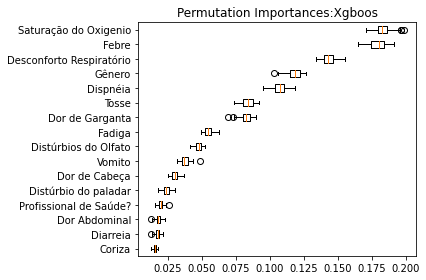

In [58]:
model=xgb_classif(X_train,y_train,lista_param[8])
feature_importance(X_train, X_val, y_train, y_val,model,'Xgboos')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:45:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


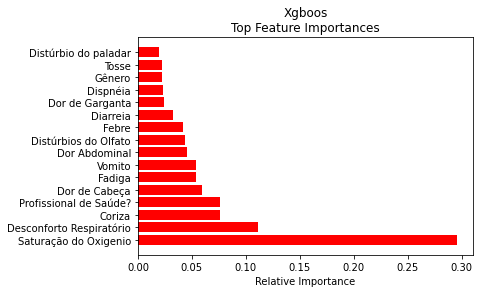

In [59]:
model_xgb=xgb_classif(x_both,y_both,lista_param[8])
importance_xgb=calculate_feature_importance(model_xgb)
plot_feature_importance(importance_xgb,'red','Xgboos')

In [60]:
importance_xgb

Saturação do Oxigenio       0.295403
Desconforto Respiratório    0.111288
Coriza                      0.076363
Profissional de Saúde?      0.075828
Dor de Cabeça               0.059068
Fadiga                      0.053924
Vomito                      0.053831
Dor Abdominal               0.045194
Distúrbios do Olfato        0.043601
Febre                       0.042173
Diarreia                    0.032014
Dor de Garganta             0.023881
Dispnéia                    0.023255
Gênero                      0.022431
Tosse                       0.022086
Distúrbio do paladar        0.019659
dtype: float32

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


Febre   0.180 +/- 0.006
Saturação do Oxigenio0.146 +/- 0.005
Desconforto Respiratório0.123 +/- 0.005
Gênero  0.122 +/- 0.005
Dispnéia0.108 +/- 0.005
Tosse   0.089 +/- 0.005
Dor de Garganta0.083 +/- 0.004
Distúrbios do Olfato0.058 +/- 0.003
Fadiga  0.052 +/- 0.003
Dor de Cabeça0.048 +/- 0.003
Vomito  0.038 +/- 0.003
Distúrbio do paladar0.030 +/- 0.003
Profissional de Saúde?0.025 +/- 0.002
Coriza  0.023 +/- 0.002
Dor Abdominal0.020 +/- 0.002
Diarreia0.017 +/- 0.002


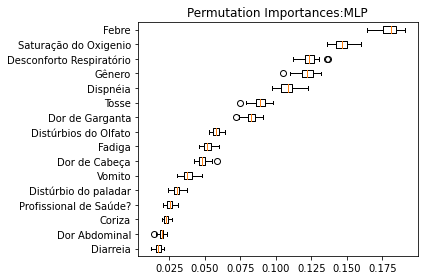

In [61]:
model=mpl_classif(X_train,y_train,lista_param[7])
feature_importance(X_train, X_val, y_train, y_val,model,'MLP')

Febre   0.129 +/- 0.006
Saturação do Oxigenio0.083 +/- 0.005
Desconforto Respiratório0.069 +/- 0.005
Gênero  0.056 +/- 0.005
Dispnéia0.038 +/- 0.005
Fadiga  0.027 +/- 0.003
Distúrbios do Olfato0.025 +/- 0.002
Tosse   0.018 +/- 0.003
Profissional de Saúde?0.014 +/- 0.003
Coriza  0.011 +/- 0.001
Vomito  0.011 +/- 0.002
Dor de Garganta0.011 +/- 0.003
Dor de Cabeça0.006 +/- 0.002
Diarreia0.004 +/- 0.001
Distúrbio do paladar0.003 +/- 0.001
Dor Abdominal0.002 +/- 0.001


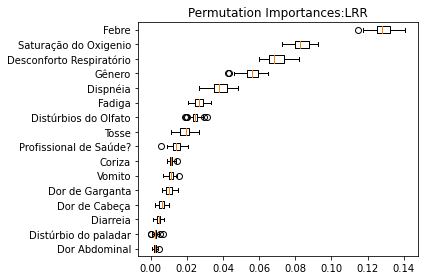

In [62]:
model=lg_with_regu_classif(X_train,y_train,lista_param[5])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')

Febre   0.131 +/- 0.006
Saturação do Oxigenio0.090 +/- 0.005
Desconforto Respiratório0.069 +/- 0.005
Gênero  0.057 +/- 0.005
Dispnéia0.032 +/- 0.004
Fadiga  0.032 +/- 0.003
Distúrbios do Olfato0.029 +/- 0.003
Vomito  0.018 +/- 0.002
Tosse   0.017 +/- 0.004
Dor de Garganta0.014 +/- 0.003
Profissional de Saúde?0.014 +/- 0.003
Coriza  0.013 +/- 0.001
Dor de Cabeça0.008 +/- 0.002
Dor Abdominal0.006 +/- 0.002
Diarreia0.004 +/- 0.001
Distúrbio do paladar0.003 +/- 0.001


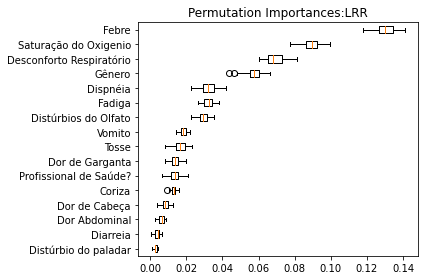

In [63]:
model=lg_without_regu_classif(X_train,y_train,lista_param[6])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')